In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor



In [3]:
# Load the dataset
file_path = 'ingredient_stock_forecast_sample.csv'
df = pd.read_csv(file_path)

df

,Date,Number_of_Serving_Communities,Sample_Given,Lettuce_Usage,Chicken_Usage,Tomato_Usage,Cheese_Usage,Carrot_Usage
0,2023-01-01,1,1,10,20,3,0.5,5
1,2023-01-02,1,0,10,20,3,0.5,5
2,2023-01-03,1,0,15,25,6,1.0,10
3,2023-01-04,1,0,15,25,6,1.0,10
4,2023-01-05,1,0,20,30,9,1.5,15
5,2023-01-06,1,0,20,30,9,1.5,15
6,2023-01-07,2,1,25,35,12,2.0,20
7,2023-01-08,2,0,25,35,12,2.0,20
8,2023-01-09,2,0,30,40,15,2.5,25
9,2023-01-10,2,0,30,40,15,2.5,25


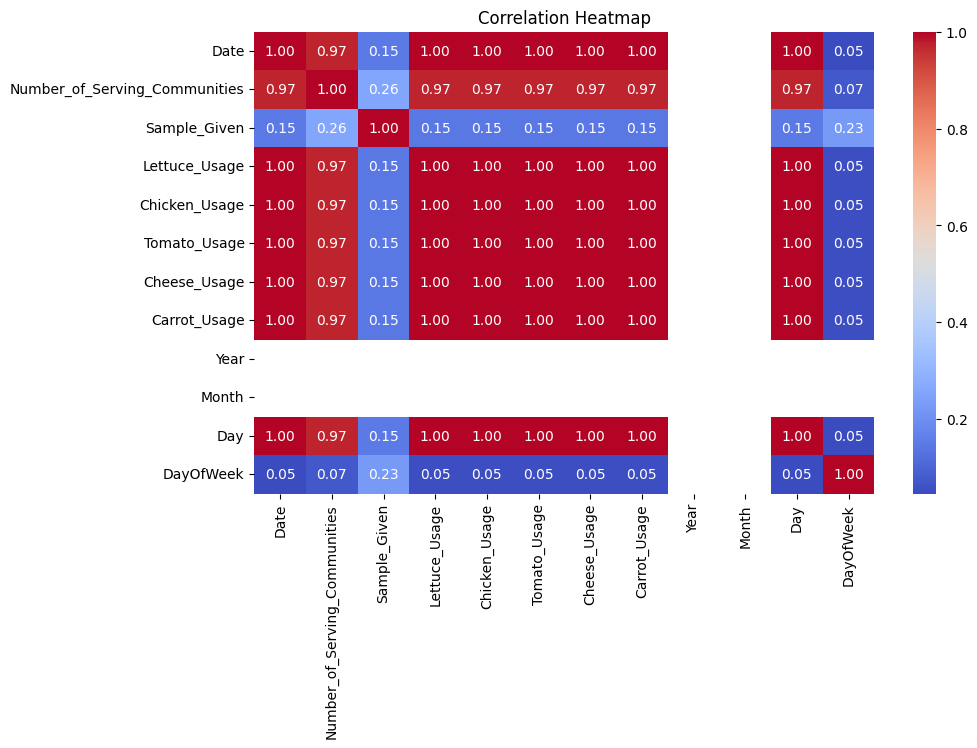

In [4]:

# Feature engineering: create time-based features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Plotting correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


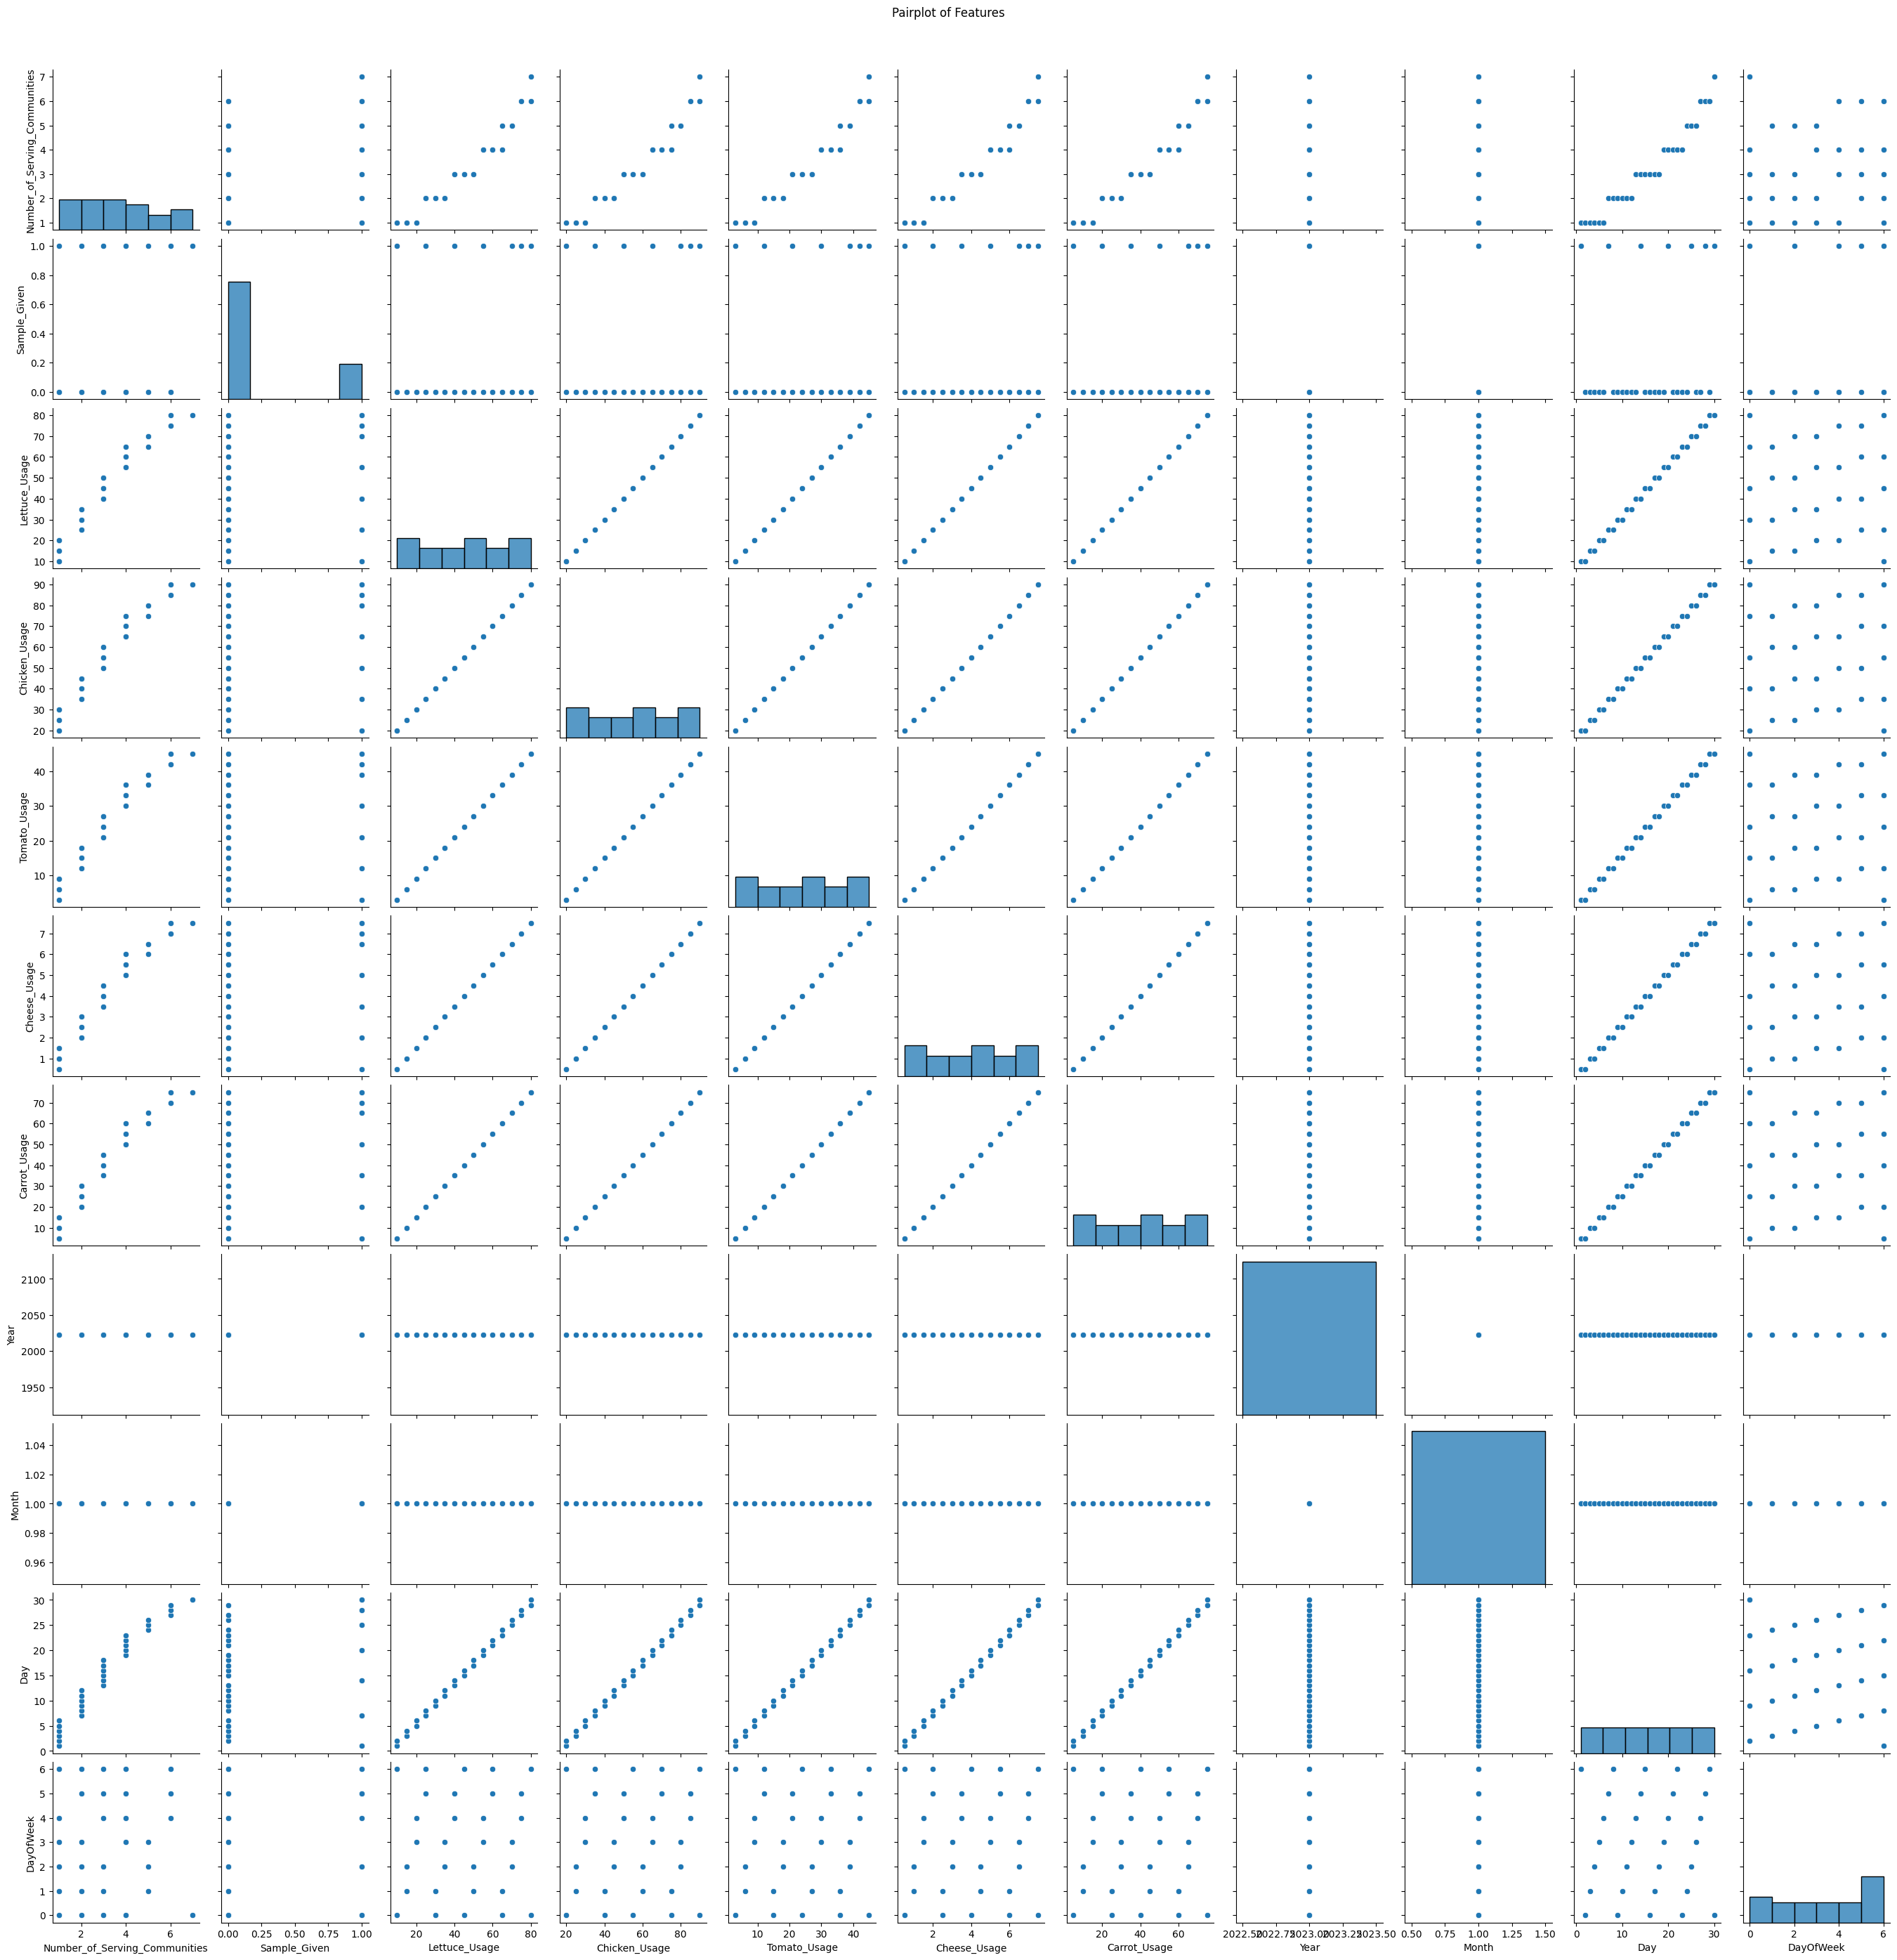

In [5]:
# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [6]:
# Prepare the features and target variables
features = df[['Number_of_Serving_Communities', 'Sample_Given', 'Year', 'Month', 'Day', 'DayOfWeek']]
targets = df[['Lettuce_Usage', 'Chicken_Usage', 'Tomato_Usage', 'Cheese_Usage', 'Carrot_Usage']]


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [10]:
# Initialize and train the multi-output regression model
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [11]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model for each target
results = {}
for i, col in enumerate(targets.columns):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    results[col] = {'MSE': mse, 'R²': r2}


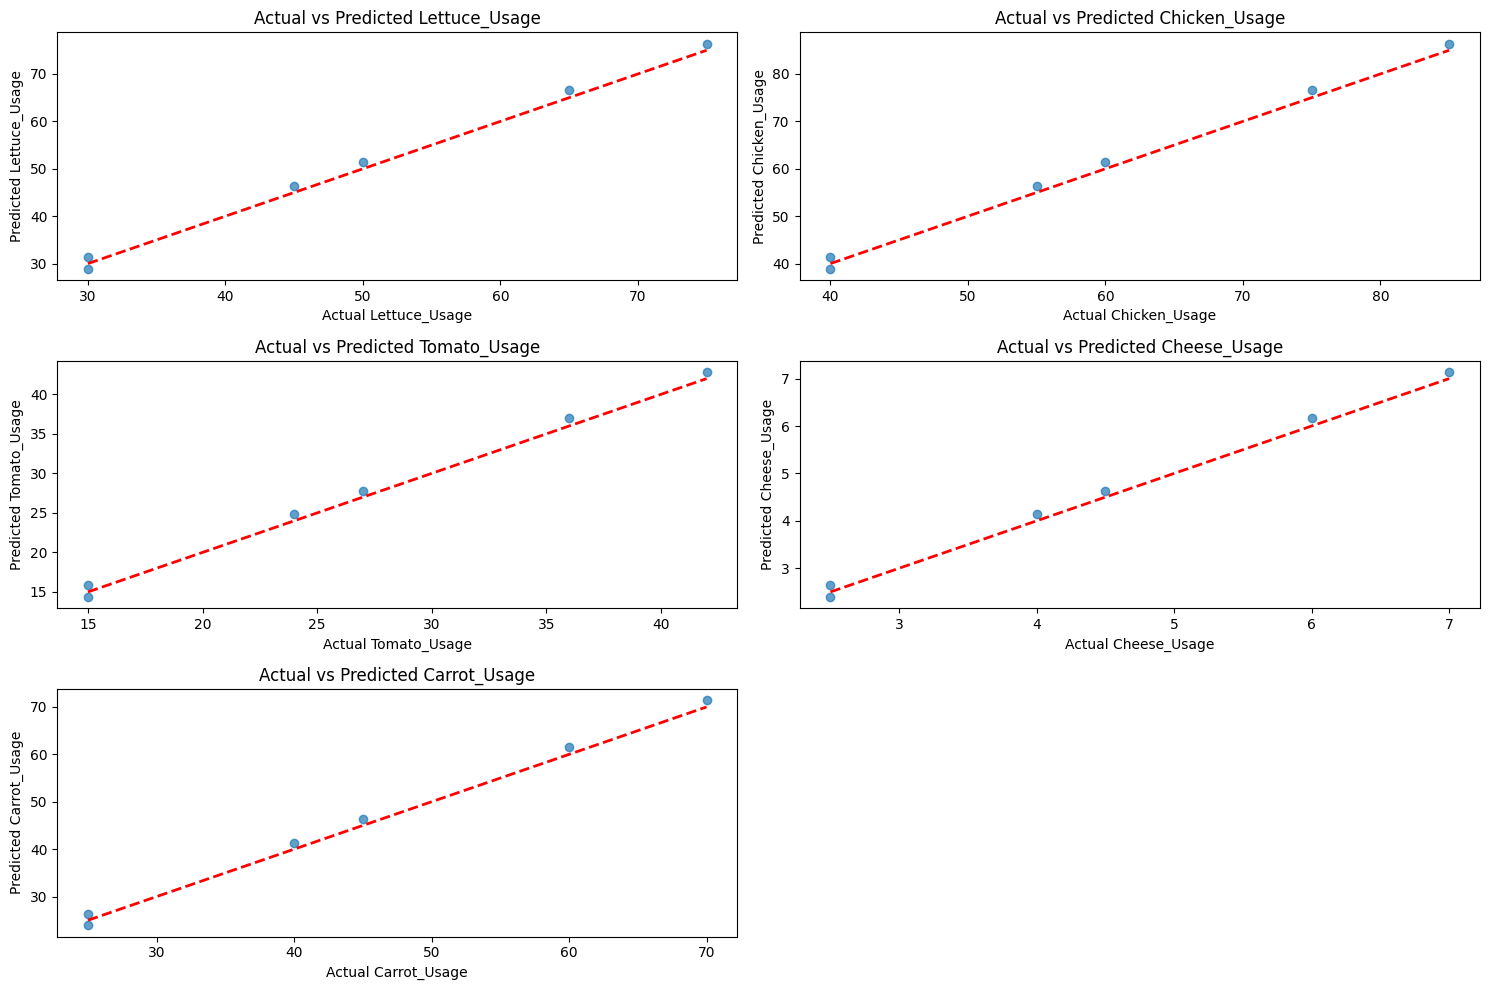

In [14]:
# Plot the results for each target
plt.figure(figsize=(15, 10))
for i, col in enumerate(targets.columns):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.7)
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], '--r', linewidth=2)
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')

plt.tight_layout()
plt.show()


In [15]:
# Print evaluation metrics
for col, metrics in results.items():
    print(f"{col} - Mean Squared Error: {metrics['MSE']}, R² Score: {metrics['R²']}")

Lettuce_Usage - Mean Squared Error: 1.9364908415546358, R² Score: 0.9930460179255893
Chicken_Usage - Mean Squared Error: 1.9364908415546376, R² Score: 0.9930460179255893
Tomato_Usage - Mean Squared Error: 0.6971367029596611, R² Score: 0.9930460179255894
Cheese_Usage - Mean Squared Error: 0.019364908415545962, R² Score: 0.9930460179255894
Carrot_Usage - Mean Squared Error: 1.9364908415546358, R² Score: 0.9930460179255893


In [16]:
cv_scores = cross_val_score(model, features, targets, cv=5, scoring='r2')
print('Cross-Validation R² Scores:', cv_scores)
print('Mean R² Score:', cv_scores.mean())
print('Standard Deviation of R² Scores:', cv_scores.std())

Cross-Validation R² Scores: [0.89091151 0.8752394  0.91275887 0.8956378  0.89940932]
Mean R² Score: 0.8947913801574939
Standard Deviation of R² Scores: 0.012183643676487676


In [18]:
def predict_usage(model, number_of_serving_communities, sample_given, date):
    # Feature engineering for the input date
    date = pd.to_datetime(date)
    year = date.year
    month = date.month
    day = date.day
    day_of_week = date.dayofweek

    # Prepare the input features
    input_features = pd.DataFrame({
        'Number_of_Serving_Communities': [number_of_serving_communities],
        'Sample_Given': [sample_given],
        'Year': [year],
        'Month': [month],
        'Day': [day],
        'DayOfWeek': [day_of_week]
    })

    # Predict the usage
    prediction = model.predict(input_features)

    # Return the predicted values as a dictionary
    return {
        'Lettuce_Usage': prediction[0][0],
        'Chicken_Usage': prediction[0][1],
        'Tomato_Usage': prediction[0][2],
        'Cheese_Usage': prediction[0][3],
        'Carrot_Usage': prediction[0][4]
    }


In [19]:
predicted_usage = predict_usage(model, number_of_serving_communities=15, sample_given=1, date='2023-02-28')
print(predicted_usage)

{'Lettuce_Usage': 78.72372394065904, 'Chicken_Usage': 88.72372394065904, 'Tomato_Usage': 44.23423436439538, 'Cheese_Usage': 7.372372394065896, 'Carrot_Usage': 73.72372394065904}
